# Python e API

### O que √© uma API?

- √â um conjunto de c√≥digos para usar um servi√ßo/site/aplicativo espec√≠fico. Cada site/ferramenta tem sua pr√≥pria API. √â importante que voc√™ saiba ler as APIs que precisar para saber usar

- Um dos padr√µes mais comuns em API √© pegar informa√ß√µes em formato json, uma esp√©cie de dicion√°rio que precisa ser tratada no Python para podermos analisar

- As possibilidades de API s√£o infinitas, vamos fazer 2 exemplos aqui: Cota√ß√£o de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre voc√™ precisa de uma conta para consumir uma API. Algumas APIs s√£o abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documenta√ß√£o da API (ou exemplos da internet) √© a chave para conseguir usar uma API 

#### Pegar a Cota√ß√£o Atual de Todas as Moedas 

In [5]:
# usaremos a biblioteca request para a parte de requisi√ß√£o
# biblioteca json para tratar os dados no formato json

import requests
import json

cotacao = requests.get("https://economia.awesomeapi.com.br/json/all")
print(cotacao) 
# <Response [404]> erro ou moeda especificas nao encontrada
#<Response [200]> exito

cotacao_dic = cotacao.json()
print(cotacao_dic)

<Response [200]>
{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'D√≥lar Americano/Real Brasileiro', 'high': '4.9802', 'low': '4.9798', 'varBid': '0.0009', 'pctChange': '0.02', 'bid': '4.9798', 'ask': '4.9807', 'timestamp': '1692651602', 'create_date': '2023-08-21 18:00:02'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'D√≥lar Americano/Real Brasileiro Turismo', 'high': '5', 'low': '5', 'varBid': '0', 'pctChange': '0', 'bid': '4.85', 'ask': '5.15', 'timestamp': '1692700680', 'create_date': '2023-08-22 07:38:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'D√≥lar Canadense/Real Brasileiro', 'high': '3.683', 'low': '3.6669', 'varBid': '0.0047', 'pctChange': '0.13', 'bid': '3.6772', 'ask': '3.6826', 'timestamp': '1692702627', 'create_date': '2023-08-22 08:10:27'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '6.3743', 'low': '6.3371', 'varBid': '0.0017', 'pctChange': '0.03', 'bid': '6.3452', 'ask': '6.3613', 'timestamp': '16927026

#### Qual foi a √∫ltima cota√ß√£o do D√≥lar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o c√≥digo em momentos diferentes, mas o seu c√≥digo deve ser o mesmo/parecido)

In [15]:
print("Dolar: {}".format(cotacao_dic['USD']['bid']))
print("Euro: {}".format(cotacao_dic['EUR']['bid']))
print("Bitcoin: {}".format(cotacao_dic['BTC']['bid']))

Dolar: 4.9798
Euro: 5.4165
Bitcoin: 130337


#### Pegar a cota√ß√£o dos √∫ltimos 30 dias do d√≥lar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o c√≥digo em momentos diferentes, mas o seu c√≥digo deve ser o mesmo/parecido)

In [36]:
#"https://economia.awesomeapi.com.br/json/daily/:moeda/:numero_dias"

cotacao_dias = requests.get("https://economia.awesomeapi.com.br/json/daily/USD-BRL/30")
print(cotacao_dias)


cotacao_dias_dic  = cotacao_dias.json()
#print(cotacao_dias_dic[0])

lista_cotacoes_dolar = [float(item['bid']) for item in cotacao_dias_dic] #listcompreheshion
print(lista_cotacoes_dolar)


print("\n")
# ussando for

lista = []

for item in cotacao_dias_dic:
    lista.append(float(item['bid']))
    
print(lista)
    

<Response [200]>
[4.9798, 4.9777, 4.9676, 4.9695, 4.97, 4.9779, 4.9888, 4.9854, 4.9631, 4.9073, 4.9073, 4.8927, 4.9032, 4.9006, 4.8989, 4.8757, 4.918, 4.8123, 4.7915, 4.7239, 4.7336, 4.7319, 4.743, 4.7371, 4.7531, 4.7269, 4.78, 4.7804, 4.797, 4.7903]


[4.9798, 4.9777, 4.9676, 4.9695, 4.97, 4.9779, 4.9888, 4.9854, 4.9631, 4.9073, 4.9073, 4.8927, 4.9032, 4.9006, 4.8989, 4.8757, 4.918, 4.8123, 4.7915, 4.7239, 4.7336, 4.7319, 4.743, 4.7371, 4.7531, 4.7269, 4.78, 4.7804, 4.797, 4.7903]


#### Pegar as cota√ß√µes do BitCoin de Jan/23 a Out/23
#### Exibindo em um gr√°fico do Matplolibüìä


In [51]:
cotacao_btc = requests.get("https://economia.awesomeapi.com.br/json/daily/BTC-BRL\200?start_date=20230101&end_date=20231031")
cotacoes_btc_dic = cotacoes_btc.json()
 # por padrao ele retorna so 30, mudamos para 200 pelo tamanho informado pelo print(len)
lista_cotacoes_btc = [float(item['bid']) for item in cotacoes_btc_dic]
lista_cotacoes_btc.reverse() # inverter a ordem 
print(lista_cotacoes_btc)
print(len(lista_cotacoes_btc))

[35150.0, 37025.0, 36836.7, 37415.0, 37158.0, 36652.1, 36800.0, 38000.1, 40050.0, 41050.0, 41212.0, 41715.0, 43392.0, 43070.0, 46424.7, 46610.0, 47626.0, 47900.0, 48553.0, 48852.0, 49700.0, 52500.0, 57700.0, 52609.1, 52499.0, 49225.0, 49700.0, 51488.8, 54450.0, 56208.0, 53609.0, 54207.4, 55300.0, 55651.1, 55760.8, 54831.8, 51440.0, 51400.0, 51600.0, 49560.0, 49735.0, 47625.1, 49000.2, 51700.3, 50650.0, 51500.0, 50865.1, 53600.0, 54001.0, 49500.4, 50400.6, 48800.4, 48820.6, 49133.5, 48096.8, 48201.0, 49350.0, 47000.0, 48100.1, 47788.9, 47750.0, 48501.4, 49679.0, 49290.6, 50405.0, 49700.0, 49750.0, 49782.0, 50710.0, 49759.1, 49800.0, 49755.0, 49915.1, 49678.2, 49746.8, 49840.0, 49960.0, 49800.0, 49208.8, 48815.5, 48993.1, 48850.0, 49890.0, 49900.1, 50360.1, 49890.0, 49905.9, 49750.0, 49920.0, 50041.3, 50073.4, 49868.0, 49320.0, 49702.1, 49651.8, 49680.0, 49516.5, 49143.0, 49321.0, 49850.0, 49951.1, 50400.2, 50402.0, 55300.0, 56161.0, 57490.0, 57330.0, 58950.0, 61298.1, 58296.3, 59800.0, 

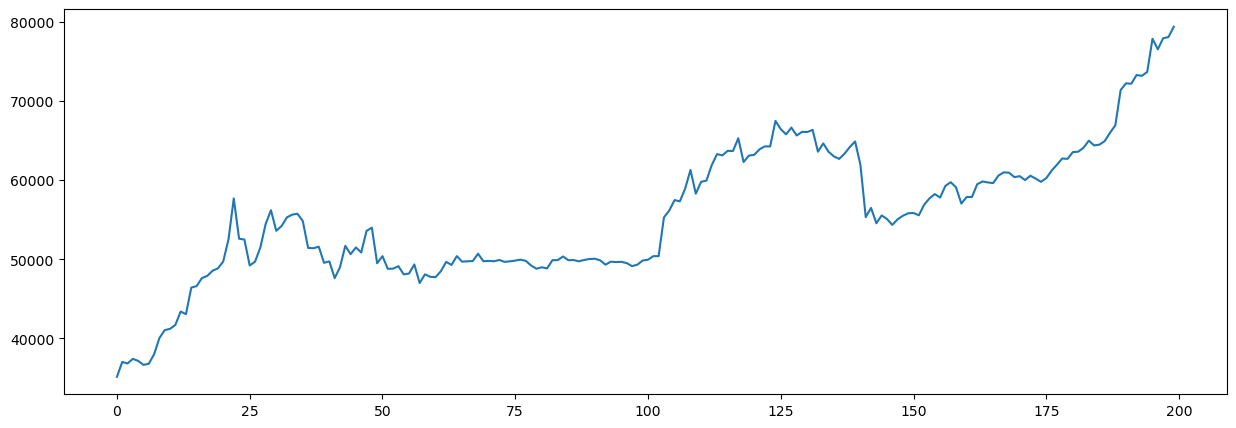

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(lista_cotacoes_btc)
plt.show()

#### Gr√°fico com as cota√ß√µes do BitCoin

AttributeError: Figure.set() got an unexpected keyword argument 'fgsize'

AttributeError: Figure.set() got an unexpected keyword argument 'fgsize'